## Exercise 01 : Line chart with styles

In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [24]:
query = """
        select * from pageviews
        where uid like 'user_%'
        """

df_view = pd.read_sql(query, conn, parse_dates='datetime')
df_view = df_view.groupby(df_view['datetime'].dt.date).count()
df_view = df_view['uid'].rename('view')
df_view.index.name = 'date'
df_view

date
2020-04-17      1
2020-04-18     23
2020-04-19     15
2020-04-21      3
2020-04-22      1
2020-04-23      5
2020-04-25      1
2020-04-26      8
2020-04-28      2
2020-04-29      4
2020-04-30      9
2020-05-01      3
2020-05-02      6
2020-05-03     19
2020-05-04      1
2020-05-05      1
2020-05-06      3
2020-05-07      2
2020-05-08     48
2020-05-09     19
2020-05-10    110
2020-05-11    200
2020-05-12     85
2020-05-13    102
2020-05-14    187
2020-05-15     29
2020-05-16      4
2020-05-17      9
2020-05-18     51
2020-05-19     11
2020-05-20     12
2020-05-21     11
2020-05-22      2
Name: view, dtype: int64

In [29]:
query = """
        select * from checker
        where uid like 'user_%'
        """

df_checker = pd.read_sql(query, conn, parse_dates='timestamp')
df_checker = df_checker.groupby(df_checker['timestamp'].dt.date).count()
df_checker = df_checker['uid'].rename('commit')
df_checker.index.name = 'date'
df_checker

date
2020-04-17     23
2020-04-18     69
2020-04-19     33
2020-04-20     25
2020-04-21     25
2020-04-22     28
2020-04-23     43
2020-04-24     16
2020-04-25    104
2020-04-26    261
2020-04-27      6
2020-04-28      5
2020-04-29     17
2020-04-30     53
2020-05-01     60
2020-05-02    242
2020-05-03    180
2020-05-04     37
2020-05-05    139
2020-05-06      2
2020-05-07     52
2020-05-08     87
2020-05-09     86
2020-05-10    143
2020-05-11    186
2020-05-12    323
2020-05-13    211
2020-05-14    575
2020-05-15     10
2020-05-16      4
2020-05-17     48
2020-05-18      3
2020-05-19     34
2020-05-20     28
2020-05-21     49
Name: commit, dtype: int64

In [43]:
df_merge = pd.merge(left=df_view, right=df_checker, on='date', how='inner')
df_merge.reset_index(inplace=True)
df_merge

,date,view,commit
0,2020-04-17,1,23
1,2020-04-18,23,69
2,2020-04-19,15,33
3,2020-04-21,3,25
4,2020-04-22,1,28
5,2020-04-23,5,43
6,2020-04-25,1,104
7,2020-04-26,8,261
8,2020-04-28,2,5
9,2020-04-29,4,17


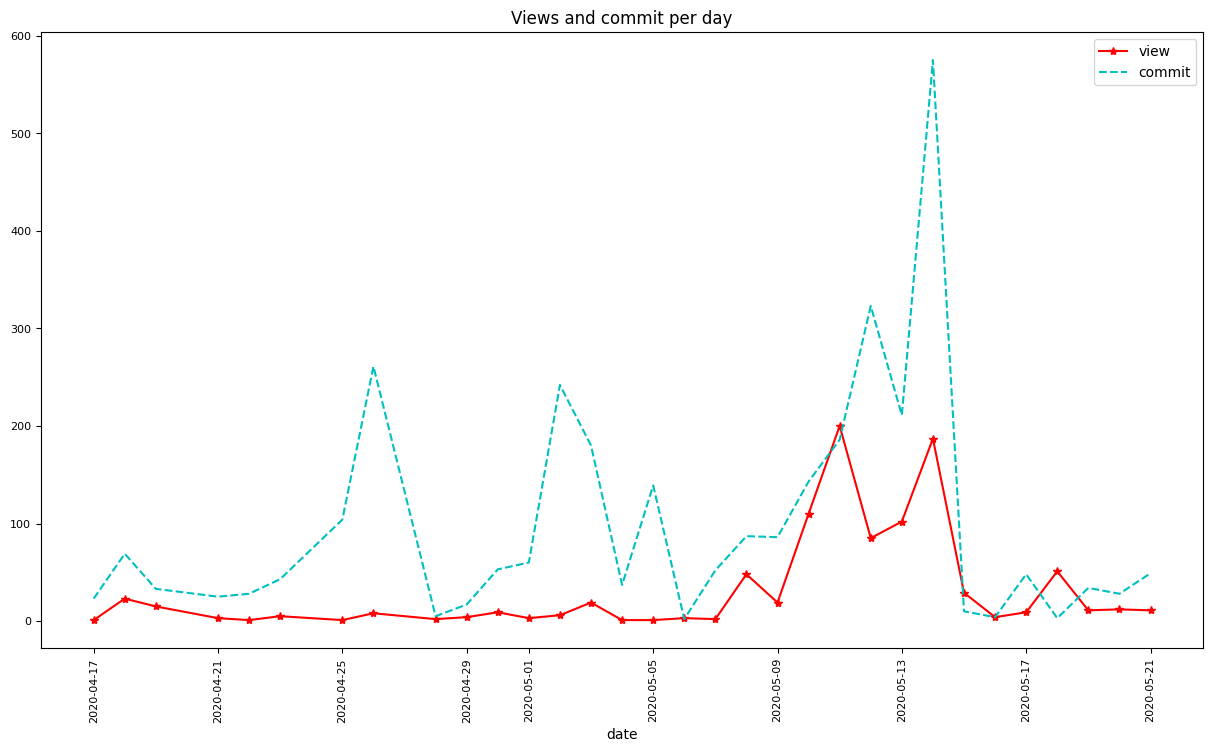

In [49]:
plt = df_merge.plot(x='date', y=['view', 'commit'], style=['-.', '--'], color=['r','c'], figsize=(15, 8), rot=90, fontsize=8, title='Views and commit per day')

How many times was the number of views larger than 150?”

In [57]:
answer = df_merge[df_merge['view'] > 150]['view'].count()
print(f'The answer is {answer}')

The answer is 2


In [ ]:
conn.close()